In [2]:
import numpy as np  #linear algebra
import pandas as pd # a data processing and CSV I/O library
#from pandas_profiling import ProfileReport
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [3]:
strk = pd.read_csv('stroke_data.csv')
strk.head(10)

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1
5,1.0,55.0,1,1,1,4,0,70.09,27.4,0,1
6,0.0,82.0,0,0,0,4,1,94.39,22.8,0,1
7,0.0,17.0,1,0,1,4,0,80.43,29.7,0,1
8,1.0,31.0,0,1,1,2,0,120.46,36.8,1,1
9,0.0,55.0,0,0,1,4,1,104.51,27.3,1,1


In [4]:
strk.info()
strk.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40907.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000
mean,0.555162,51.327255,0.213835,0.127719,0.821340,3.461134,0.514886,122.075901,30.406355,0.488609,0.500122
std,0.496954,21.623969,0.410017,0.333781,0.383072,0.780919,0.499784,57.561531,6.835072,0.499876,0.500006
min,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.920000,29.400000,0.000000,1.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.590000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


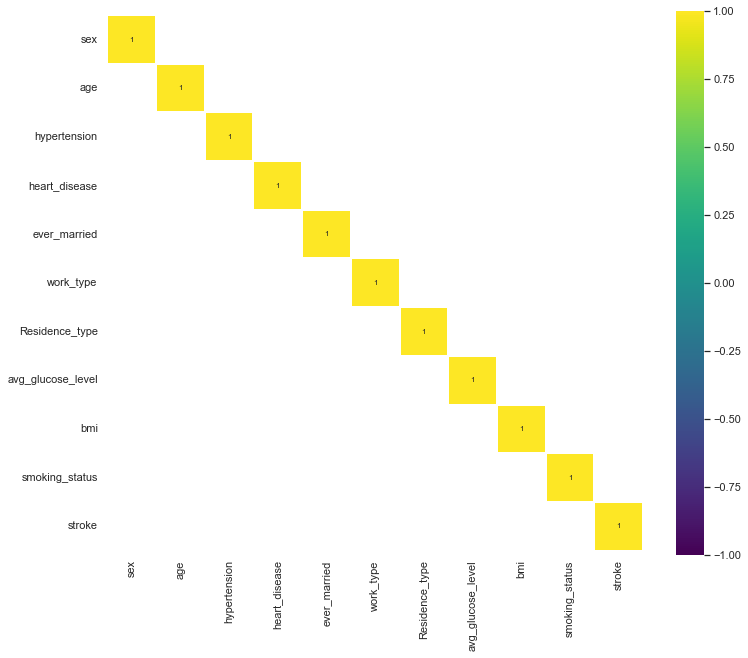

In [5]:
corr = strk.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True);

<AxesSubplot:>

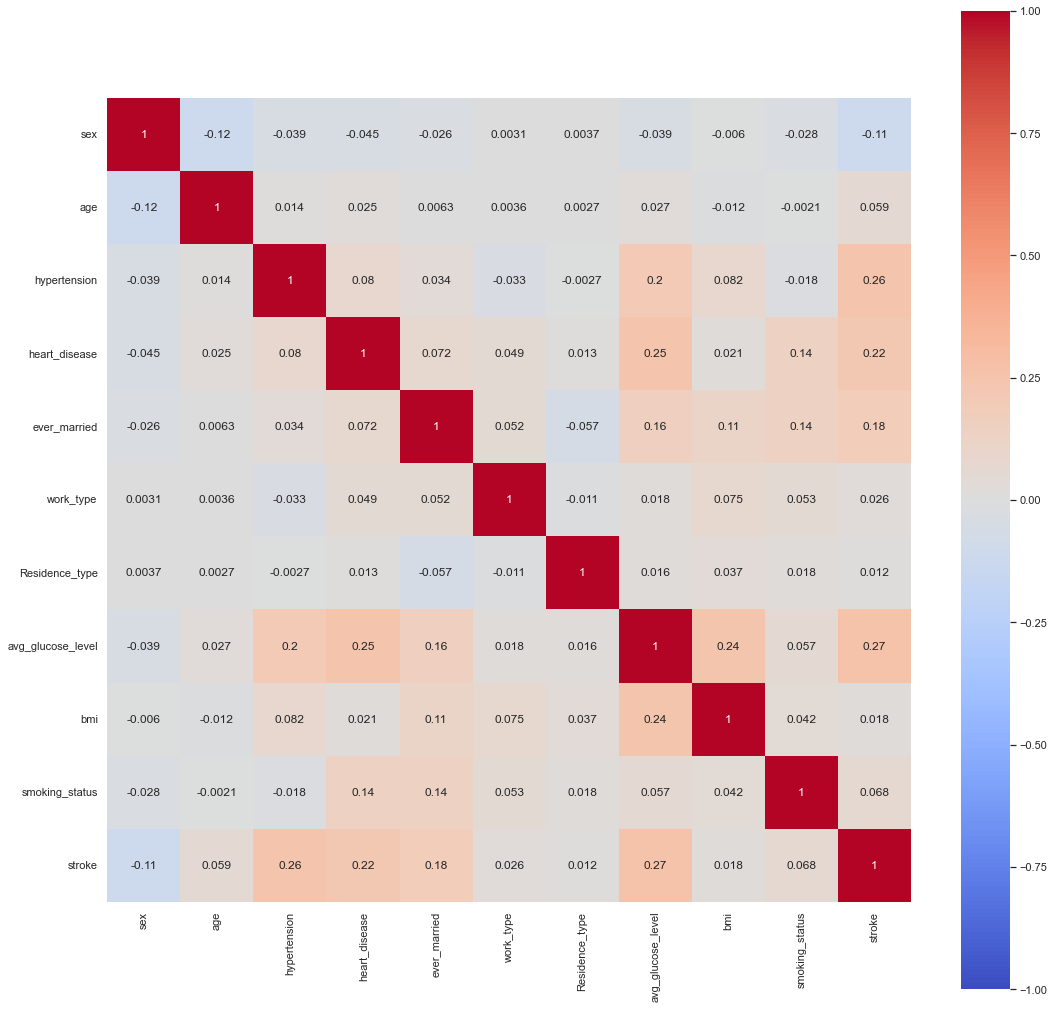

In [6]:
plt.figure(figsize=(18,18))
sns.heatmap(strk.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

In [7]:
strk = strk[np.isfinite(strk).all(1)]

In [8]:
X = strk.drop('stroke',axis=1).values
y = strk[['stroke']]

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2,random_state=42)

In [10]:
models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train.values.ravel()) # Train Model
    # Make predictions
    y_test_pred =  model.predict(X_test)

    print(list(models.keys())[i])
    print(classification_report(y_test, y_test_pred))

xgb_clr = XGBClassifier()
xgb_clr.fit(X_train, y_train)
y_pred_xgb = xgb_clr.predict(X_test)
# accuracy_score(y_test, y_pred_xgb)
print(classification_report(y_test, y_pred_xgb))

Logisitic Regression
              precision    recall  f1-score   support

           0       0.66      0.75      0.70      4112
           1       0.71      0.61      0.66      4070

    accuracy                           0.68      8182
   macro avg       0.68      0.68      0.68      8182
weighted avg       0.68      0.68      0.68      8182

Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4112
           1       1.00      1.00      1.00      4070

    accuracy                           1.00      8182
   macro avg       1.00      1.00      1.00      8182
weighted avg       1.00      1.00      1.00      8182

Random Forest
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4112
           1       0.99      1.00      1.00      4070

    accuracy                           1.00      8182
   macro avg       1.00      1.00      1.00      8182
weighted avg       1.00  

[0.09843389 0.09655149 0.12739897 0.11208134 0.1532114  0.07478698
 0.06441592 0.11090334 0.0865491  0.0756676 ]


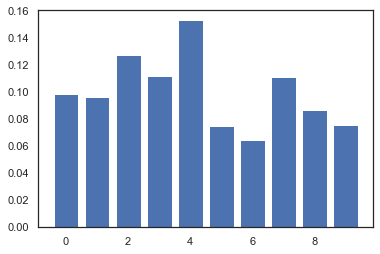

In [11]:
print(xgb_clr.feature_importances_)
plt.bar(range(len(xgb_clr.feature_importances_)), xgb_clr.feature_importances_)
plt.show()

[1.21693776e-04 2.22956686e-04 4.20552141e-02 2.57558803e-02
 4.51463778e-02 6.04584444e-02 2.30986133e-02 4.47538017e-01
 3.19637582e-01 3.59652212e-02]


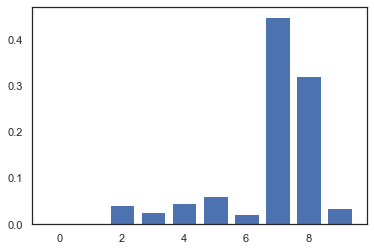

[0.00796234 0.0449066  0.05719858 0.03906707 0.03426044 0.05901613
 0.0329359  0.38556591 0.30718832 0.03189871]


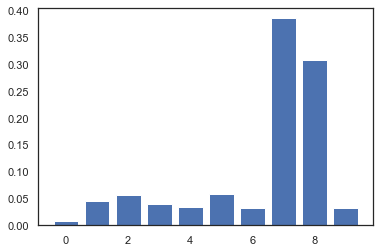

AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

In [12]:
models={
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train.values.ravel()) # Train Model
    # Make predictions
    y_test_pred =  model.predict(X_test)

    print(model.feature_importances_)
    plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
    plt.show()